In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [4]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [5]:
df.describe(include=object)

Undergrad Marital.Status Urban
count        600            600   600
unique         2              3     2
top          YES         Single   YES
freq         312            217   302

In [6]:
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

# EDA

<Axes: >

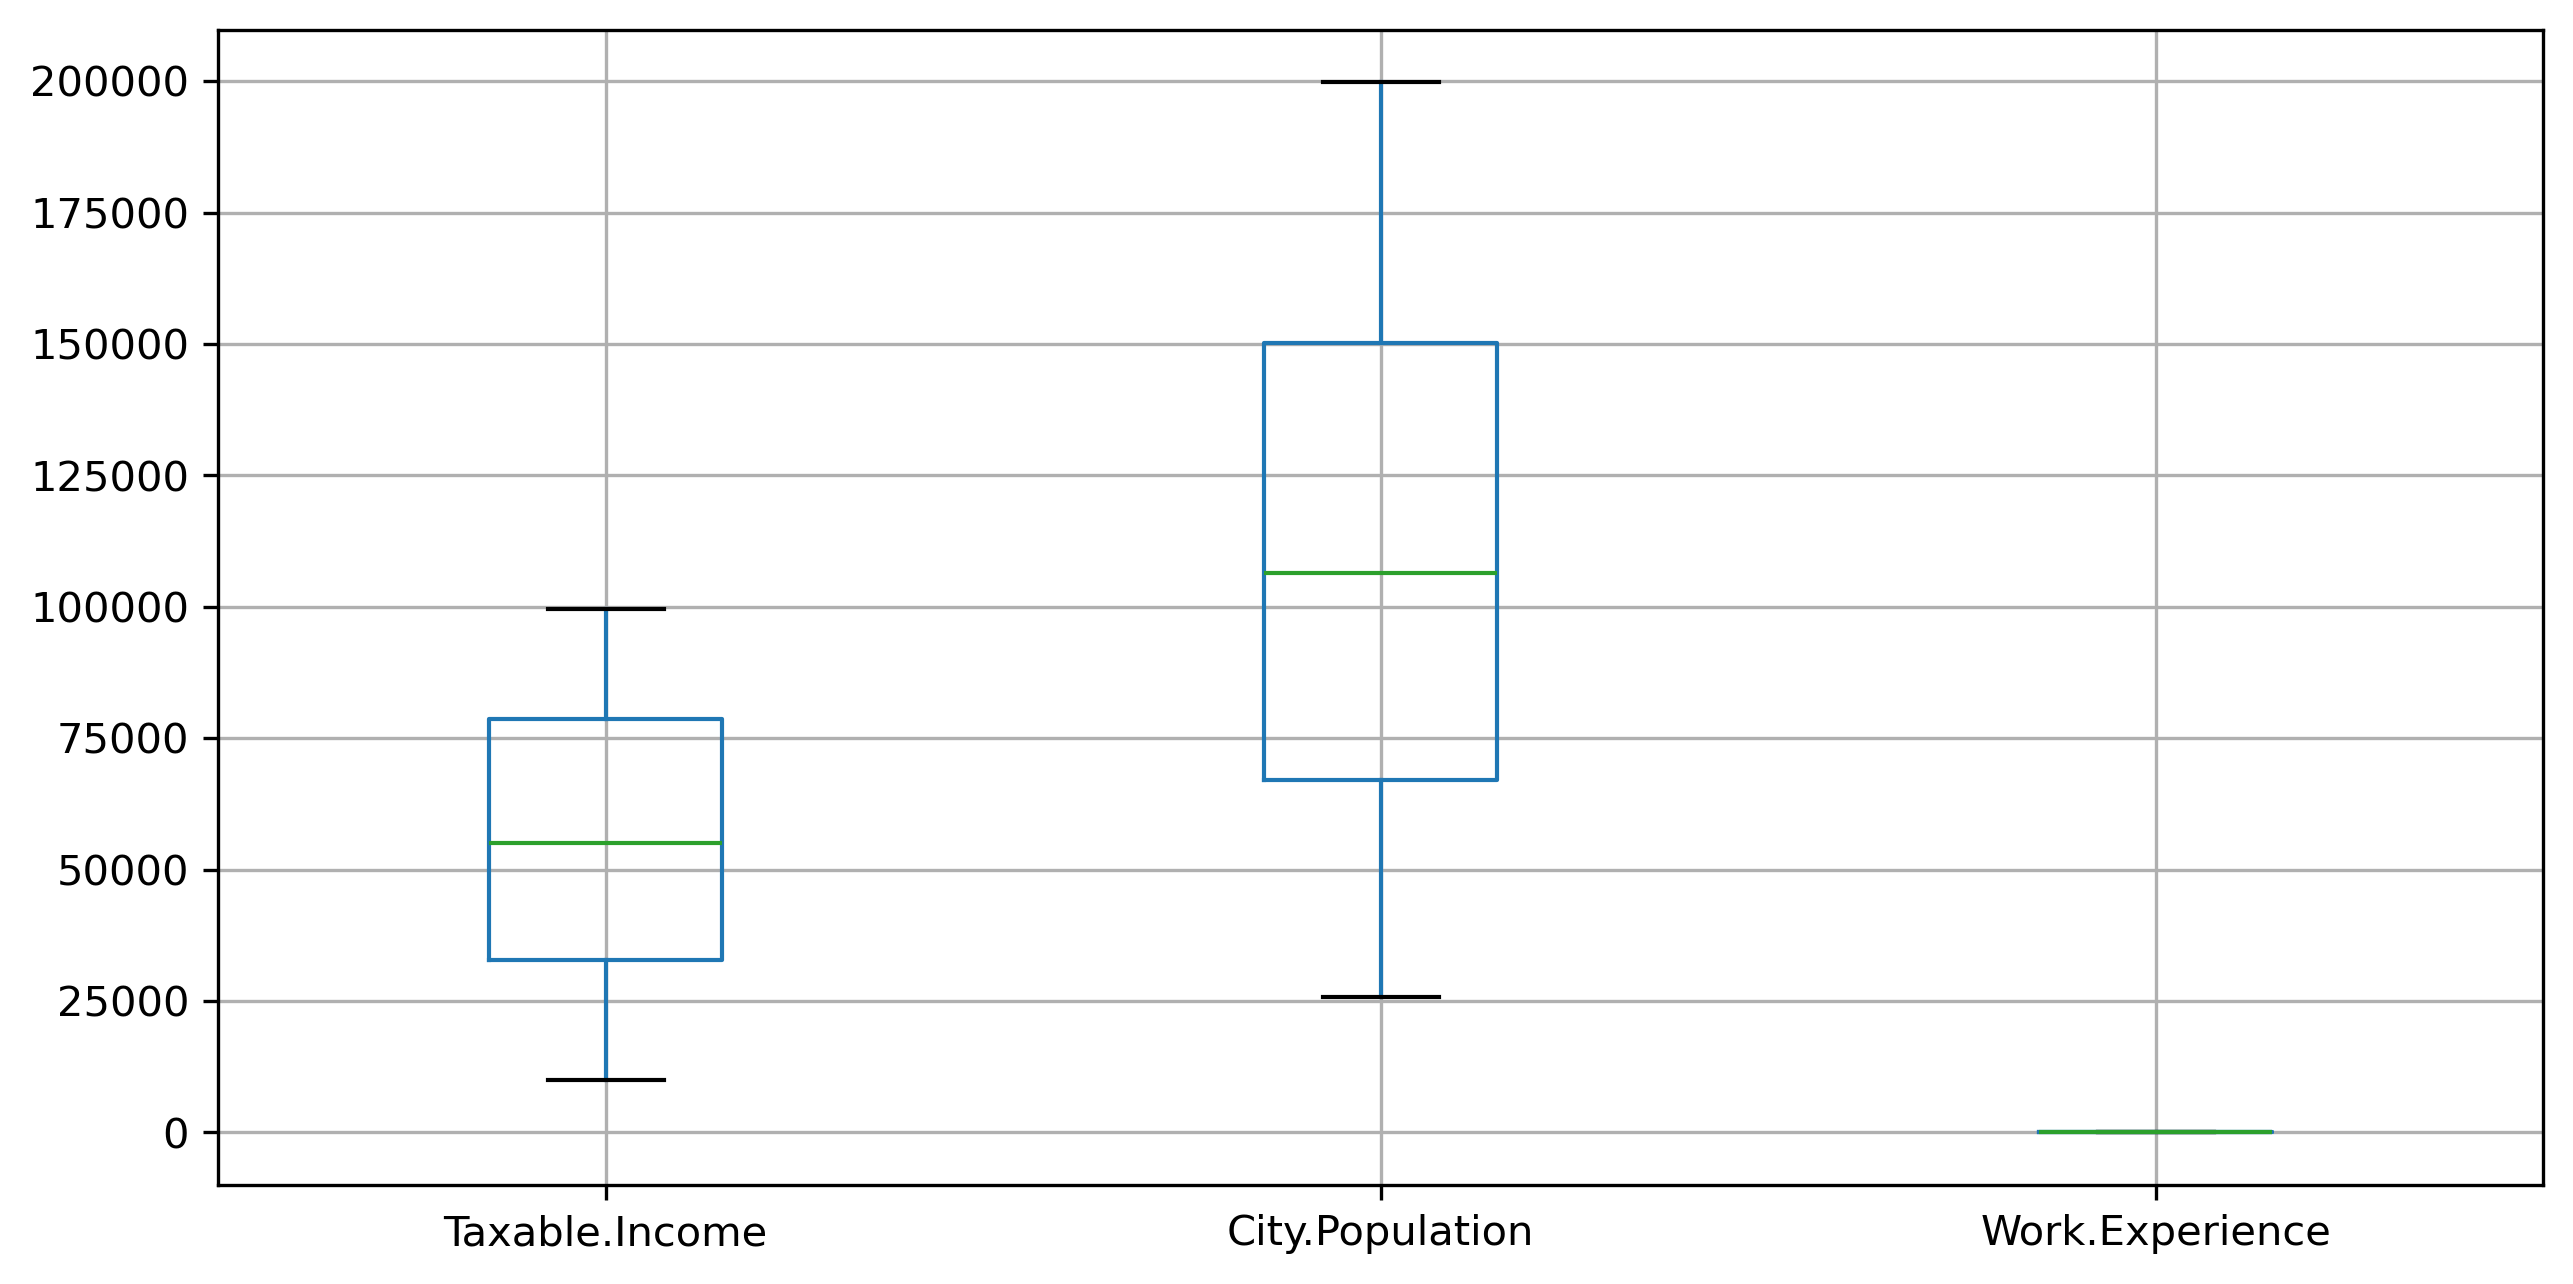

In [7]:
df.boxplot()

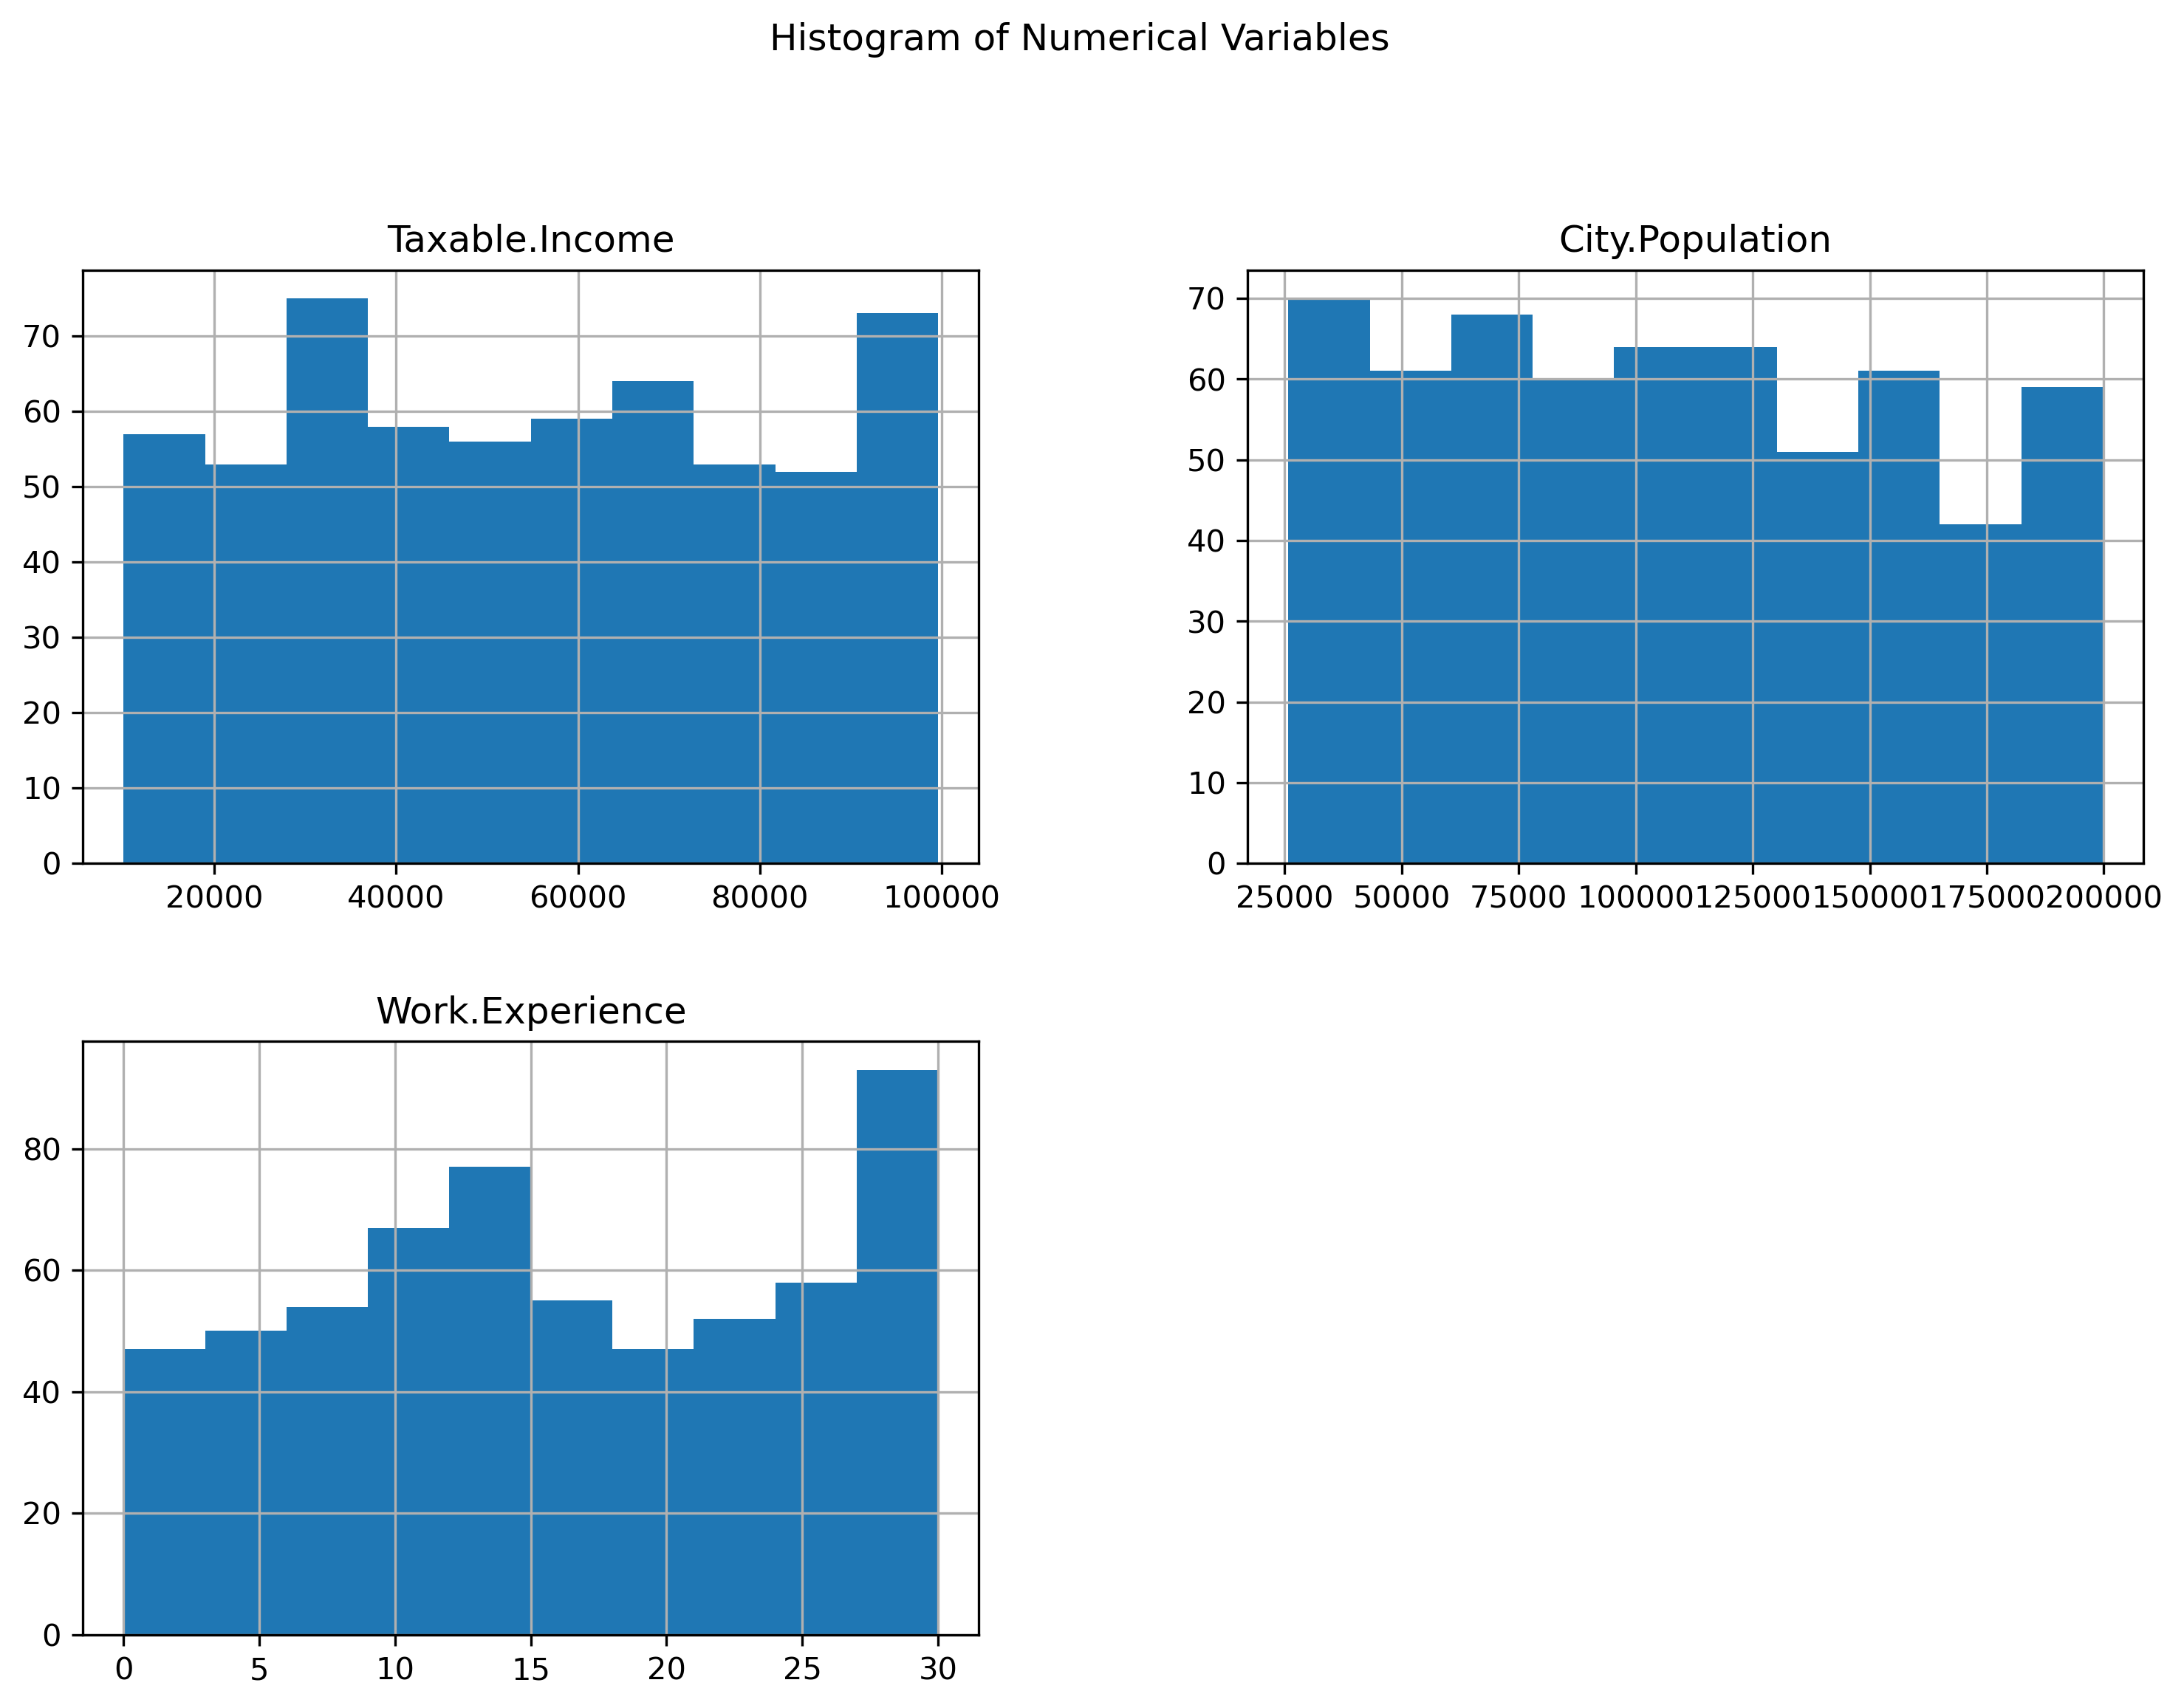

In [8]:
numerical_features = df.select_dtypes(int).columns
df[numerical_features].hist(figsize=(12, 8))
plt.suptitle('Histogram of Numerical Variables', y=1.02)
plt.show()

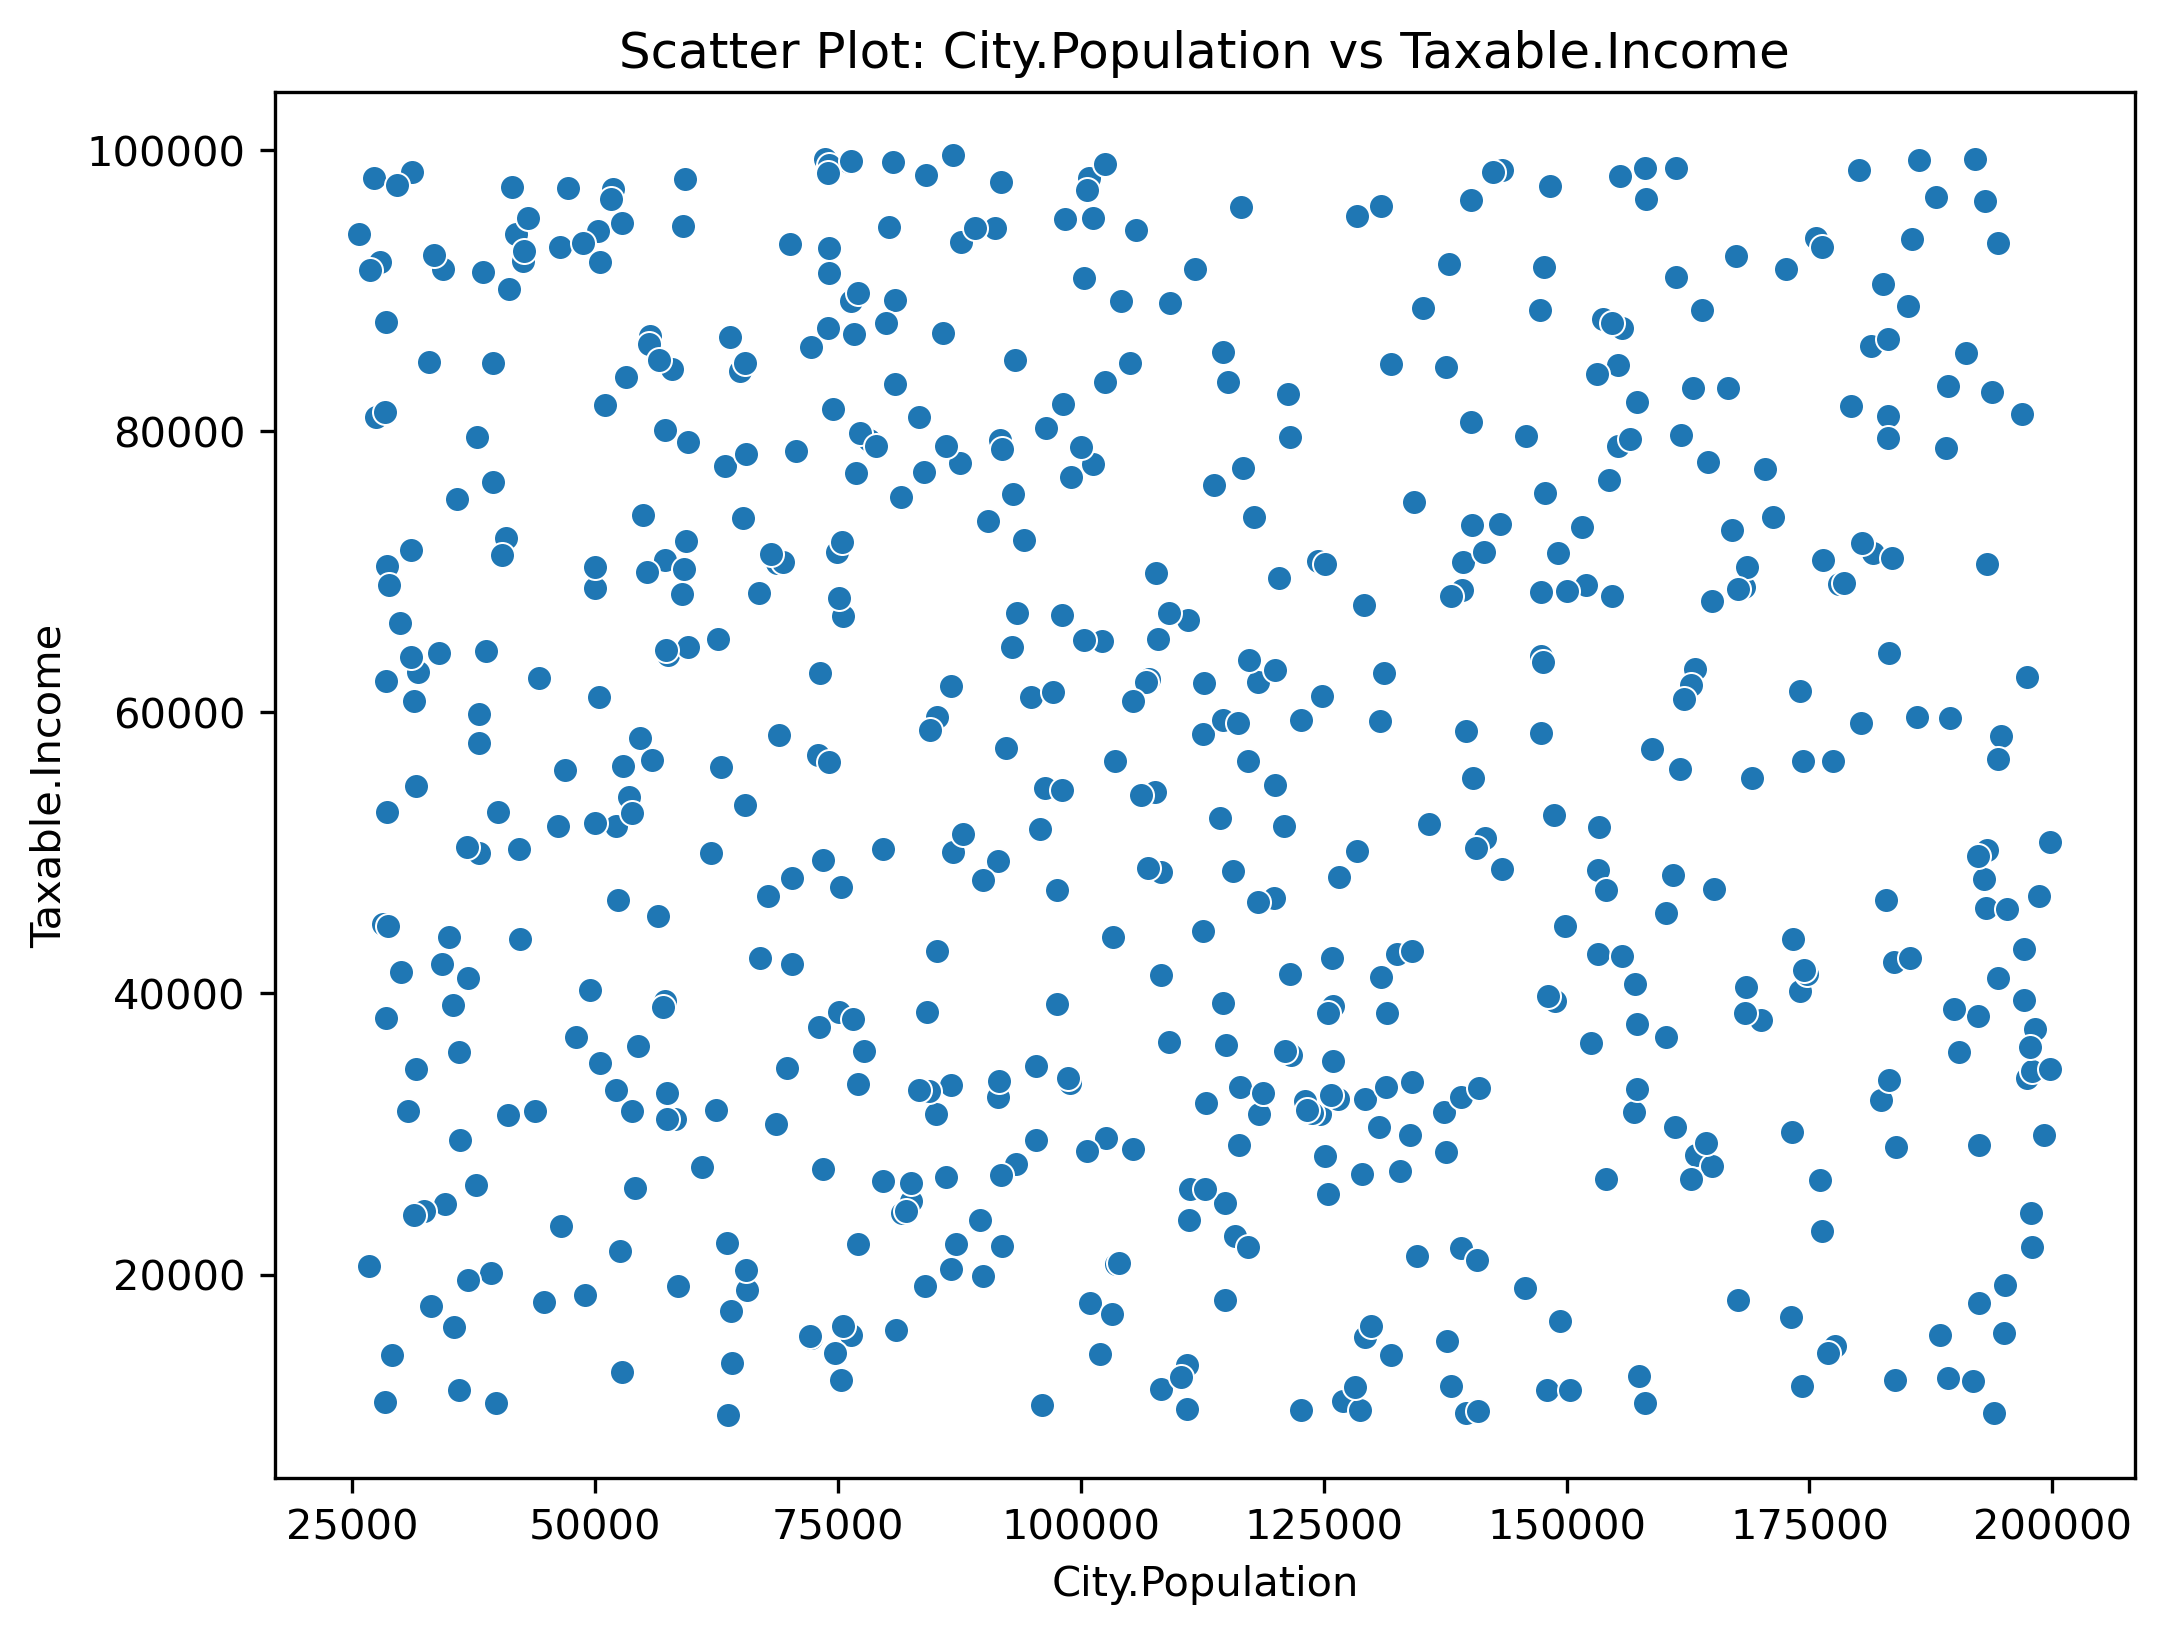

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='City.Population', y='Taxable.Income', data=df)
plt.title('Scatter Plot: City.Population vs Taxable.Income')
plt.xlabel('City.Population')
plt.ylabel('Taxable.Income')
plt.show()

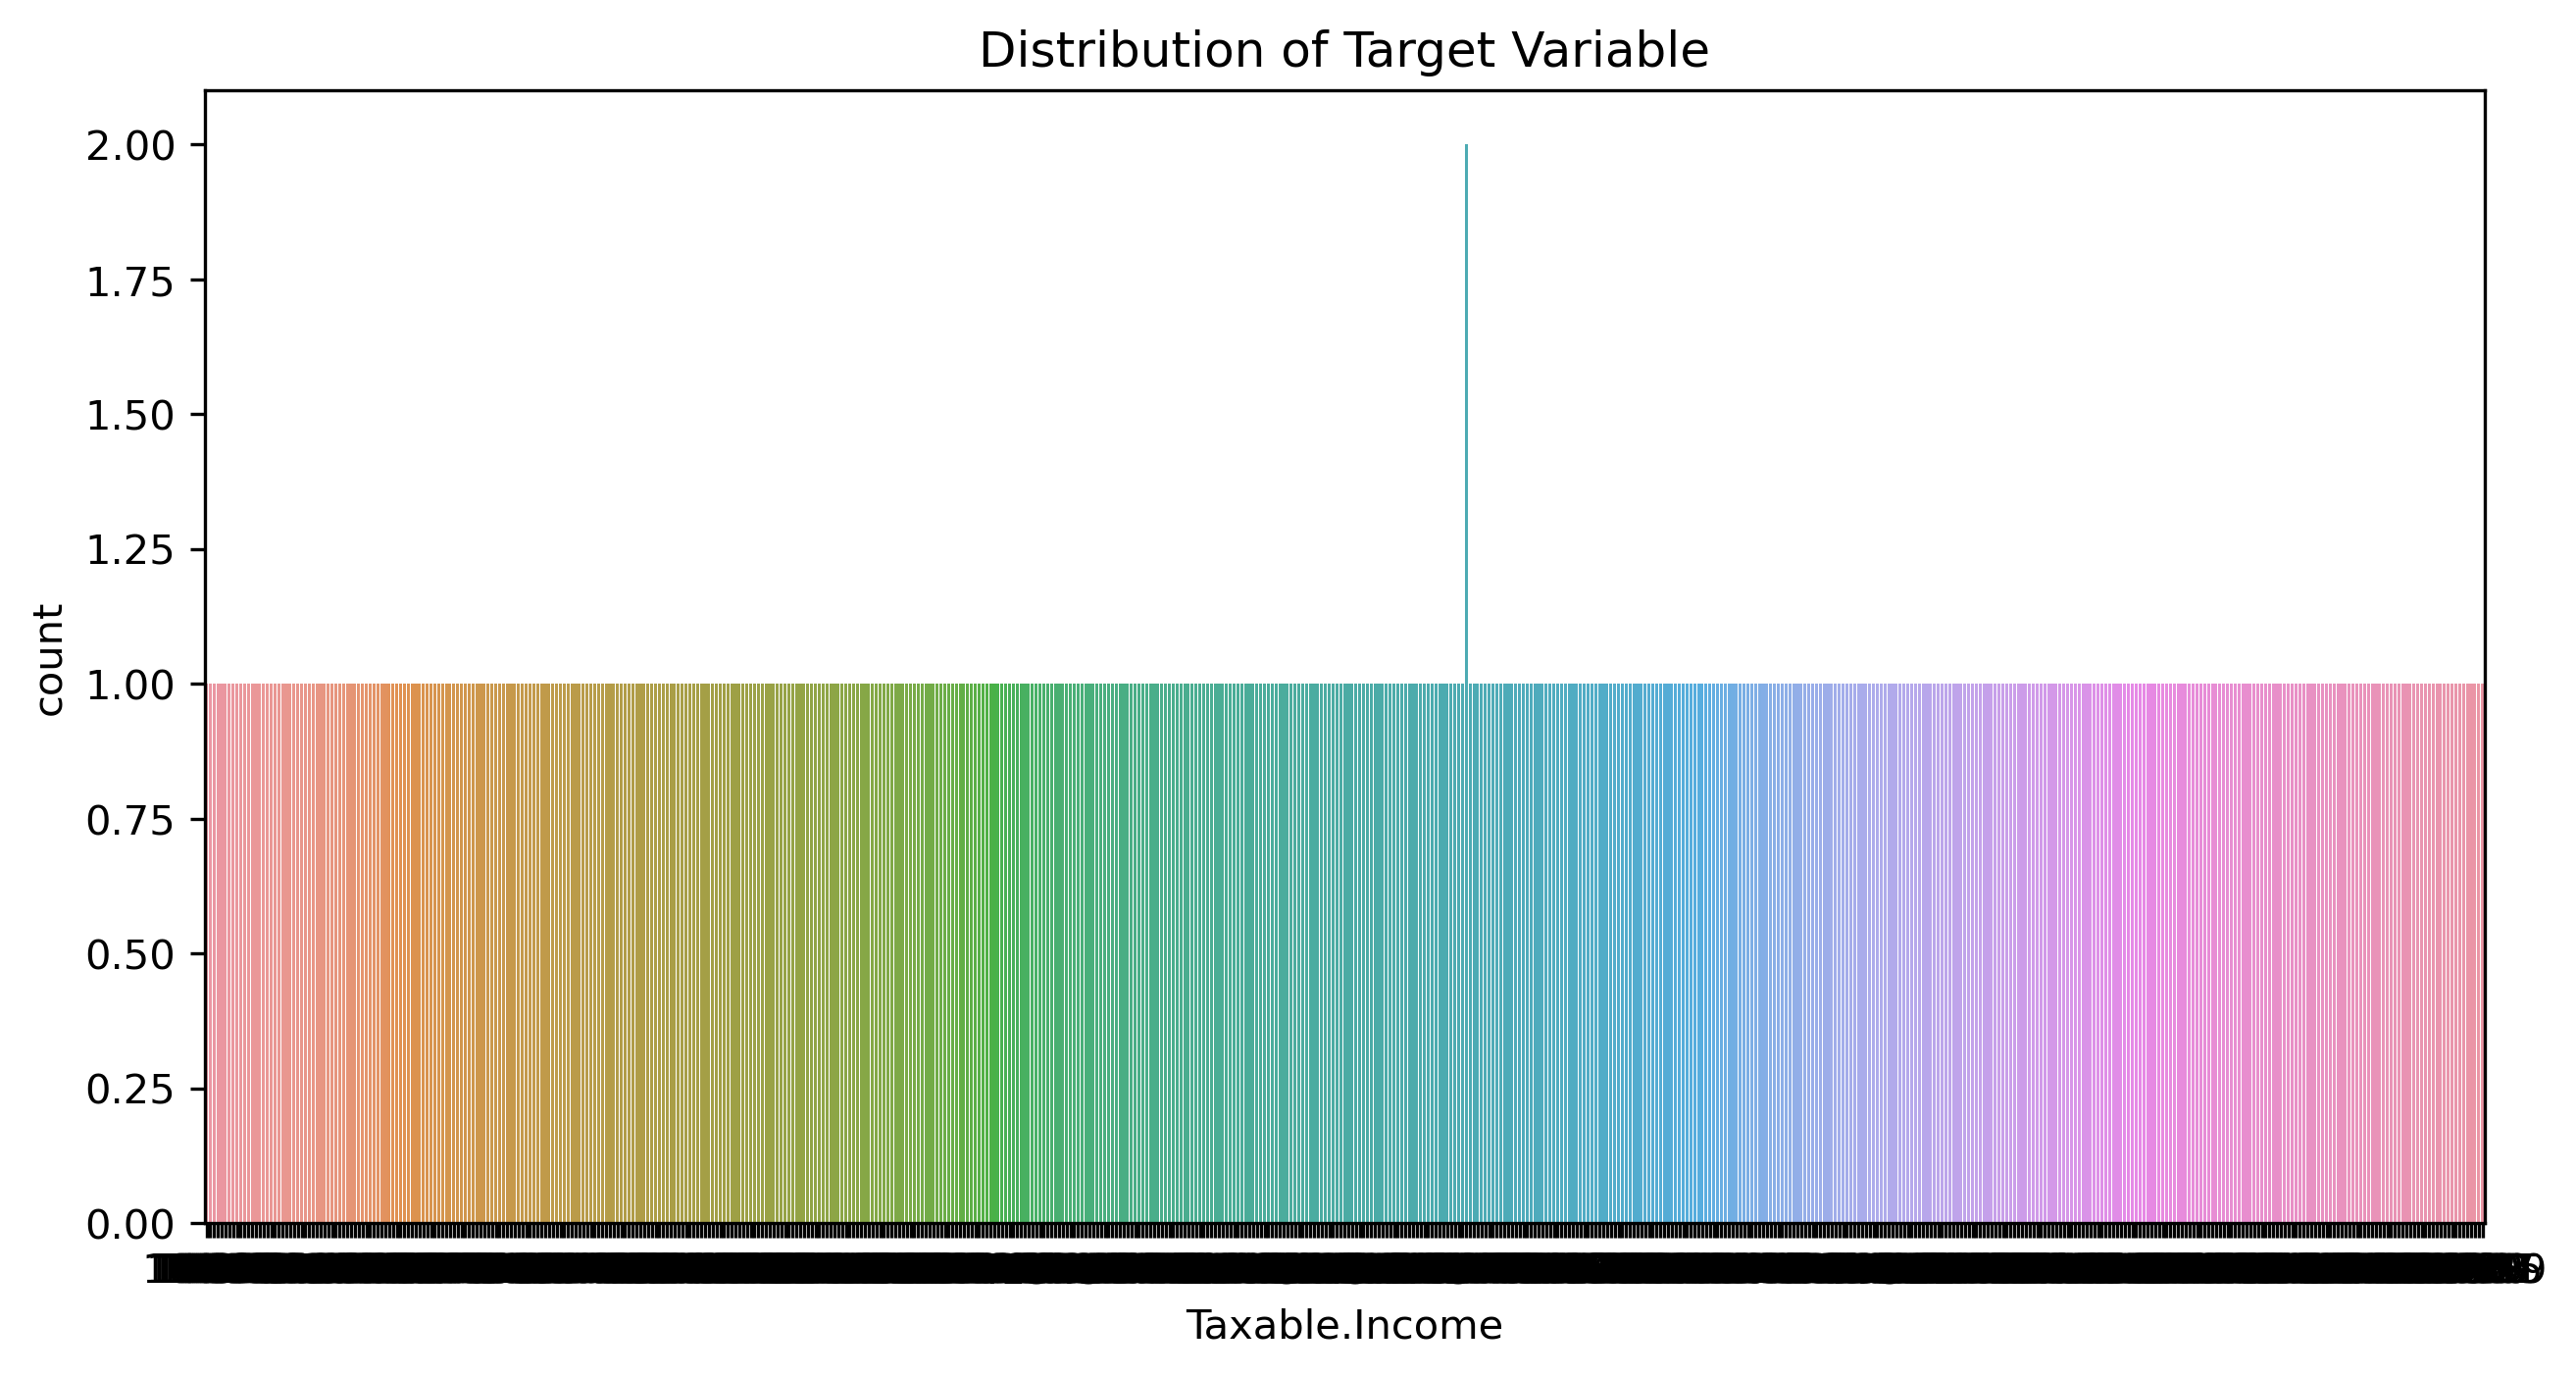

In [10]:
sns.countplot(x='Taxable.Income', data=df)
plt.title('Distribution of Target Variable')
plt.show()


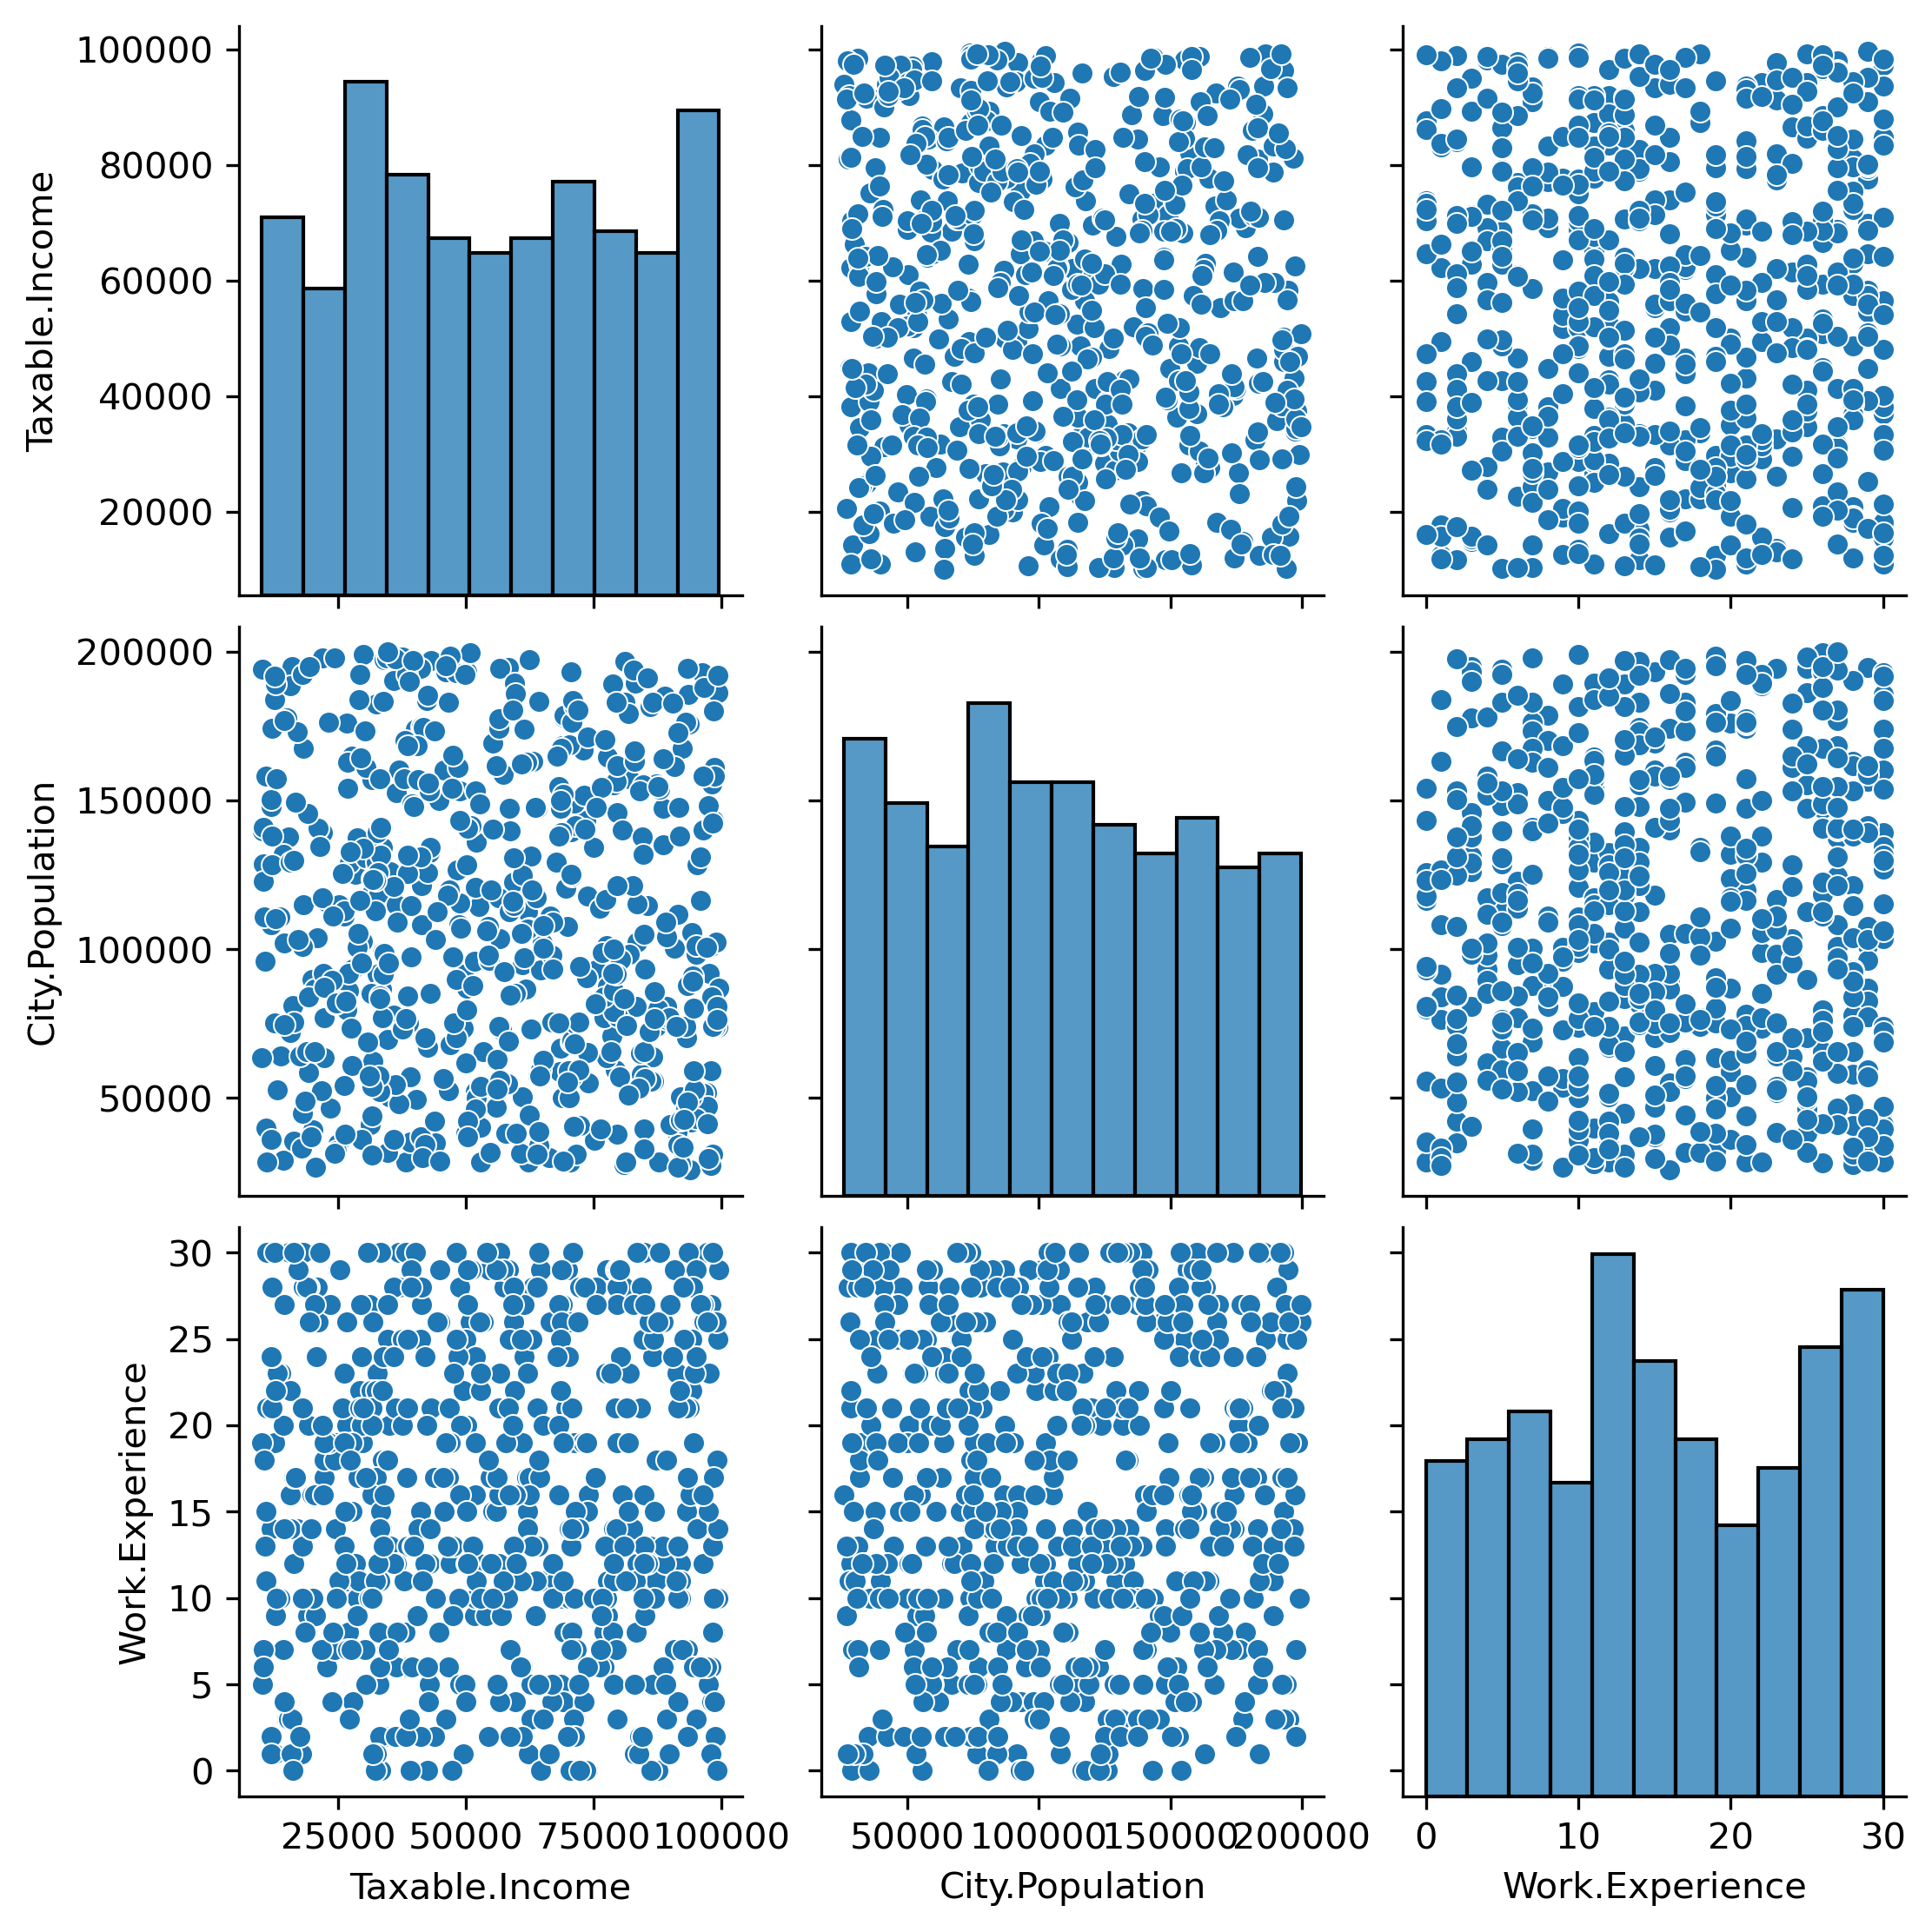

In [11]:
sns.pairplot(df)

In [12]:
j = 0
for i in df['Taxable.Income']:
    if i <= 30000 :
        df['Taxable.Income'][j] = 'Risky'
    else:
        df['Taxable.Income'][j] = 'Good'
    j = j + 1

In [13]:
df['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [14]:
df

Undergrad Marital.Status Taxable.Income  City.Population  Work.Experience  \
0          NO         Single           Good            50047               10   
1         YES       Divorced           Good           134075               18   
2          NO        Married           Good           160205               30   
3         YES         Single           Good           193264               15   
4          NO        Married           Good            27533               28   
..        ...            ...            ...              ...              ...   
595       YES       Divorced           Good            39492                7   
596       YES       Divorced           Good            55369                2   
597        NO       Divorced           Good           154058                0   
598       YES        Married           Good           180083               17   
599        NO       Divorced           Good           158137               16   

    Urban  
0     YES  
1     YES  
2     YES  
3     YES  
4      NO  
..    ...  
595   YES  
596   YES  
597   YES  
598    NO  
599    NO  

[600 rows x 6 columns]

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [16]:
cat_col = df.select_dtypes(object).columns
df[cat_col]

Undergrad Marital.Status Taxable.Income Urban
0          NO         Single           Good   YES
1         YES       Divorced           Good   YES
2          NO        Married           Good   YES
3         YES         Single           Good   YES
4          NO        Married           Good    NO
..        ...            ...            ...   ...
595       YES       Divorced           Good   YES
596       YES       Divorced           Good   YES
597        NO       Divorced           Good   YES
598       YES        Married           Good    NO
599        NO       Divorced           Good    NO

[600 rows x 4 columns]

In [17]:
df[cat_col] = oe.fit_transform(df[cat_col])

In [18]:
df

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0.0             2.0             0.0            50047   
1          1.0             0.0             0.0           134075   
2          0.0             1.0             0.0           160205   
3          1.0             2.0             0.0           193264   
4          0.0             1.0             0.0            27533   
..         ...             ...             ...              ...   
595        1.0             0.0             0.0            39492   
596        1.0             0.0             0.0            55369   
597        0.0             0.0             0.0           154058   
598        1.0             1.0             0.0           180083   
599        0.0             0.0             0.0           158137   

     Work.Experience  Urban  
0                 10    1.0  
1                 18    1.0  
2                 30    1.0  
3                 15    1.0  
4                 28    0.0  
..               ...    ...  
595                7    1.0  
596                2    1.0  
597                0    1.0  
598               17    0.0  
599               16    0.0  

[600 rows x 6 columns]

In [19]:
X = df.drop(columns='Taxable.Income')
X

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0          0.0             2.0            50047               10    1.0
1          1.0             0.0           134075               18    1.0
2          0.0             1.0           160205               30    1.0
3          1.0             2.0           193264               15    1.0
4          0.0             1.0            27533               28    0.0
..         ...             ...              ...              ...    ...
595        1.0             0.0            39492                7    1.0
596        1.0             0.0            55369                2    1.0
597        0.0             0.0           154058                0    1.0
598        1.0             1.0           180083               17    0.0
599        0.0             0.0           158137               16    0.0

[600 rows x 5 columns]

In [20]:
y = df['Taxable.Income']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable.Income, Length: 600, dtype: float64

# 

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X = sc.fit_transform(X)

In [23]:
X

array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()

In [26]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
ypred = dtr.predict(X_test)

In [28]:
ypred

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.])

In [29]:
dtr.score(X_train, y_train), dtr.score(X_test, y_test)

(1.0, 0.6916666666666667)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {
    'criterion' : ['log_loss', 'entropy', 'gini'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [32]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [33]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['log_loss', 'entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [34]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 3, 'splitter': 'random'}

In [35]:
dtr = DecisionTreeClassifier(criterion='log_loss',
                           max_depth=3,splitter='random')

In [36]:
dtr.fit(X_train,y_train)
ypred  = dtr.predict(X_test)

In [37]:
dtr.score(X_train,y_train),dtr.score(X_test,y_test)

(0.8, 0.7833333333333333)

In [38]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [40]:
df['Taxable.Income'].value_counts()

Taxable.Income
0.0    476
1.0    124
Name: count, dtype: int64

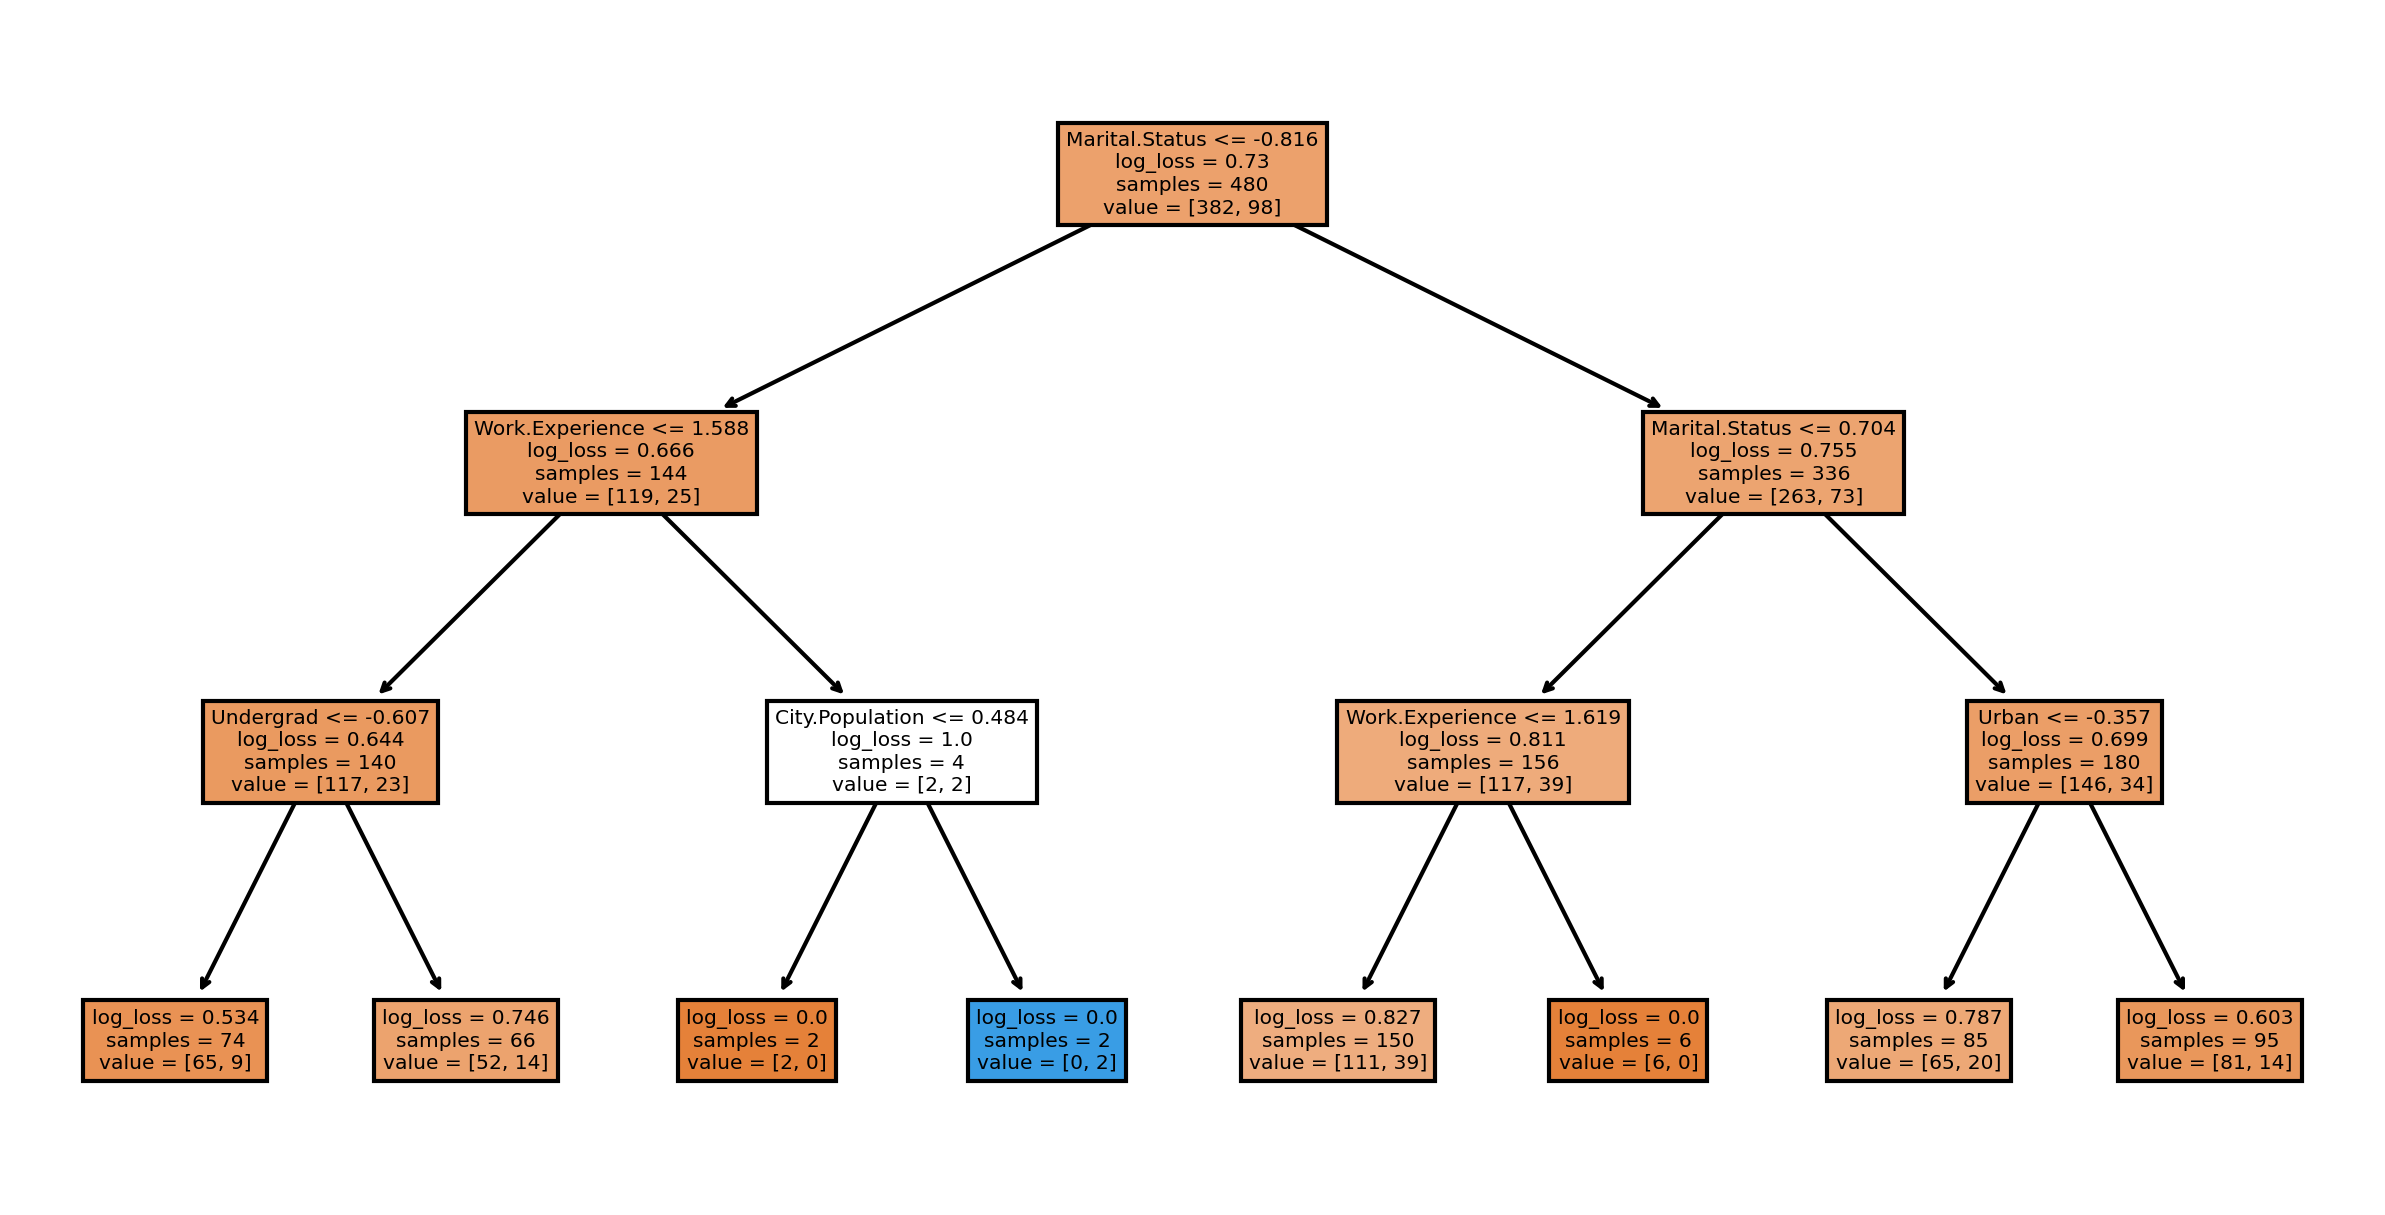

In [45]:
tree.plot_tree(dtr, feature_names= ['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'],
              filled=True)
plt.show()